In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris 

In [5]:
data = load_iris()

In [10]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
X = load_iris().data

In [18]:
y = load_iris().target

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=42)

X_train.shape, X_test.shape

((105, 4), (45, 4))

### Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
tree_model = DecisionTreeClassifier()

In [39]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred = tree_model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(y_pred,y_test)

1.0

In [70]:
from sklearn import tree

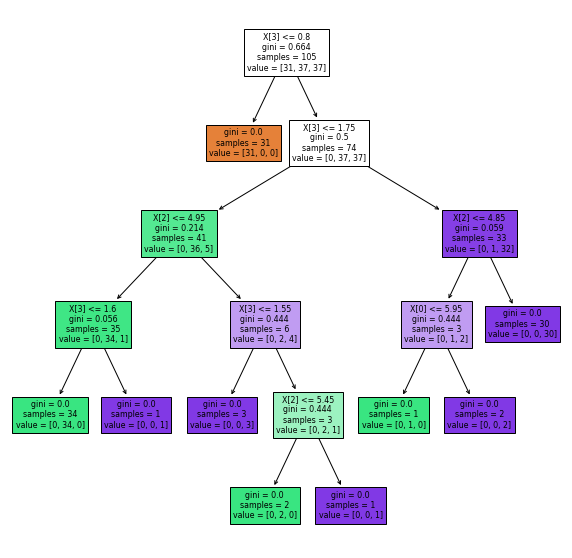

In [71]:
plt.figure(figsize=(10,10))

tree.plot_tree(tree_model, filled=True)

plt.show()

### Hyperparameter Tunning

In [110]:
tree_model.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [248]:
score_space = {
    'criterion' : ['gini','impurity'],
    'splitter' : ['random','best'],
    'max_depth' : [2,3,4,5,6],
    'max_features' : ['sqrt','auto', 'log2']
}

In [249]:
import warnings
warnings.filterwarnings('ignore')

In [250]:
from sklearn.model_selection import GridSearchCV

In [251]:
GS = GridSearchCV(estimator=tree_model, param_grid=score_space, cv=10)

In [252]:
GS.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'impurity'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'splitter': ['random', 'best']})

In [253]:
GS.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [254]:
GS.best_score_

0.9436363636363637

In [255]:
y_gs_pred = GS.predict(X_test)

In [256]:
accuracy_score(y_gs_pred, y_test)

0.9777777777777777

AttributeError: 'GridSearchCV' object has no attribute 'tree_'

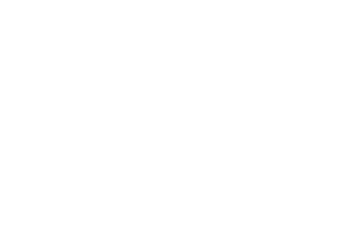

In [257]:
tree.plot_tree(GS)